# Relazioni spaziali ed operazioni

## obiettivi della lezione
- caricare dati tabellare (es. csv o xls) come geodataframe
- conversione di proiezioni spaziali
- relazioni spaziali
- join spaziale
- operazioni spaziali

*Dati utlizzati:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Istituto Nazionale di Statistica
- [ICCU - Istituto Centrale per il Catalogo Unico delle Biblioteche Italiane e per le informazioni bibliografiche](https://anagrafe.iccu.sbn.it/it/)


### requisiti
- conoscenza di python
- pandas
- lezione precedente

### status
*"Spatial is Special"*

---

## Setup dell'ambiente

In [1]:
librerie <- c("sf", "readr", "dplyr", "ggplot2")
for (lib in librerie) {
  if (!require(lib, character.only = TRUE)) {
    install.packages(lib)
  }
}
library("sf")
library("readr")
library("dplyr")
library("ggplot2")

Loading required package: sf

Linking to GEOS 3.12.1, GDAL 3.9.1, PROJ 9.4.1; sf_use_s2() is TRUE

Loading required package: readr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



# Setup dei dati

## Unità amministrative

geopackage con le unità amministrative ISTAT

per il corso è disponibile una versione delle unità amministrative ISTAT in formato geopackage disponibile [qui](https://github.com/napo/sna_geospatial_datascience/raw/refs/heads/main/data/istat_administrative_units_generalized_2024.gpkg)

In [2]:
# URL del file .gpkg
url <- 'https://github.com/napo/sna_geospatial_datascience/raw/refs/heads/main/data/istat_administrative_units_generalized_2024.gpkg'
# Scarica il file temporaneamente
temp_file <- tempfile(fileext = ".gpkg")
download.file(url, temp_file, mode = "wb")

In [3]:
# Leggi il layer "macroregions" dal file .gpkg
macroregioni <- st_read(temp_file, layer = "macroregions")

Reading layer `macroregions' from data source 
  `/tmp/RtmpsImRp2/file17321ca7d7d.gpkg' using driver `GPKG'
Simple feature collection with 5 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N


In [4]:
names(macroregioni)

[1] "COD_RIP"    "DEN_RIP"    "Shape_Leng" "Shape_Area" "geom"

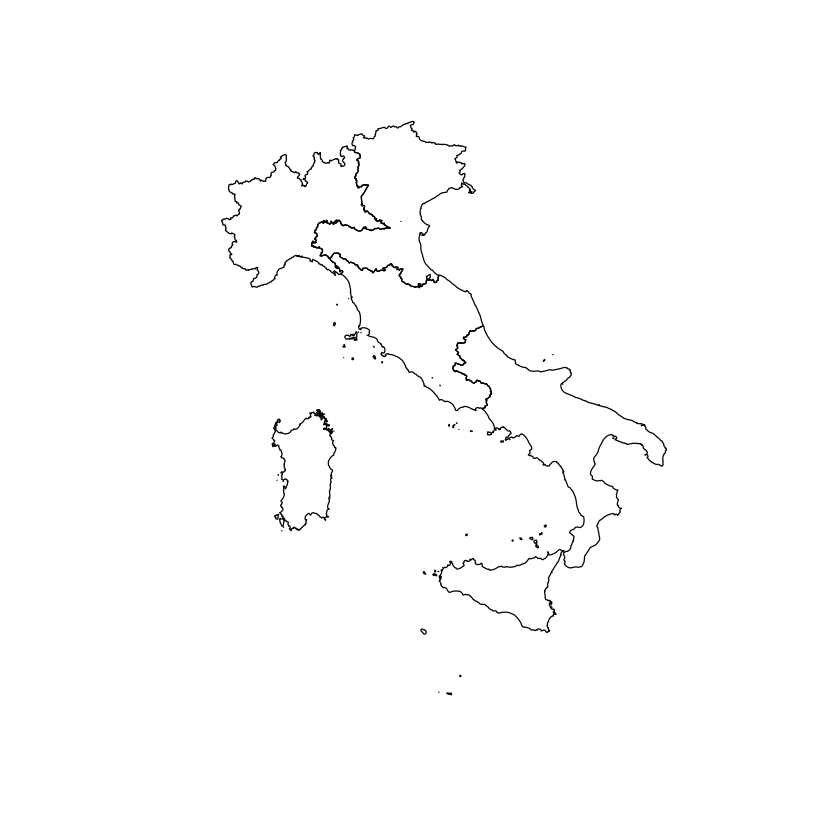

In [5]:
plot(macroregioni$geom)

In [6]:
regioni <- st_read(temp_file, layer = "regioni")
provincie = st_read(temp_file, layer = "province")
comuni = st_read(temp_file, layer = "comuni")

Reading layer `regioni' from data source `/tmp/RtmpsImRp2/file17321ca7d7d.gpkg' using driver `GPKG'
Simple feature collection with 20 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N
Reading layer `province' from data source `/tmp/RtmpsImRp2/file17321ca7d7d.gpkg' using driver `GPKG'
Simple feature collection with 107 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N
Reading layer `comuni' from data source `/tmp/RtmpsImRp2/file17321ca7d7d.gpkg' using driver `GPKG'
Simple feature collection with 7899 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N


In [7]:
regioni

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



COD_RIP COD_REG DEN_REG               Shape_Leng Shape_Area 
1  1        1      Piemonte              1234644.0  25391636806
2  1        2      Valle d'Aosta          311187.1   3258608424
3  1        3      Lombardia             1411360.5  23862867853
4  2        4      Trentino-Alto Adige    800731.7  13605964490
5  2        5      Veneto                1056503.6  18351494741
6  2        6      Friuli-Venezia Giulia  659341.1   7936833768
7  1        7      Liguria                821916.5   5417714497
8  2        8      Emilia-Romagna        1176991.7  22501817676
9  3        9      Toscana               1304649.6  22985007078
10 3       10      Umbria                 619404.6   8463968722
11 3       11      Marche                 618848.3   9344542629
12 3       12      Lazio                 1056599.4  17236487921
13 4       13      Abruzzo                613572.8  10828888286
14 4       14      Molise                 433630.8   4459797834
15 4       15      Campania               890506.5  13667847424
16 4       16      Puglia                1182953.1  19541033601
17 4       17      Basilicata             613038.4  10071594222
18 4       18      Calabria               847415.6  15212651631
19 5       19      Sicilia               1344687.7  25824319688
20 5       20      Sardegna              1449230.5  24106296672
   geom                          
1  MULTIPOLYGON (((457749.5 51...
2  MULTIPOLYGON (((390652.6 50...
3  MULTIPOLYGON (((485536.5 49...
4  MULTIPOLYGON (((743273.9 52...
5  MULTIPOLYGON (((768135.2 51...
6  MULTIPOLYGON (((871036.7 50...
7  MULTIPOLYGON (((568227.8 48...
8  MULTIPOLYGON (((618343.9 48...
9  MULTIPOLYGON (((674479.6 46...
10 MULTIPOLYGON (((776982.1 48...
11 MULTIPOLYGON (((802366.7 48...
12 MULTIPOLYGON (((876021.9 45...
13 MULTIPOLYGON (((901822.8 47...
14 MULTIPOLYGON (((983693.1 46...
15 MULTIPOLYGON (((1037330 444...
16 MULTIPOLYGON (((1280636 445...
17 MULTIPOLYGON (((1073707 444...
18 MULTIPOLYGON (((1083359 441...
19 MULTIPOLYGON (((822901.4 39...
20 MULTIPOLYGON (((449019.5 43...

ICCU rilascia l'anagrafe delle biblioteche italiane con un file CSV con licenza CC0.<Br/>La pagina informativa è disponibile a questo indirizzo
[https://anagrafe.iccu.sbn.it/it/open-data/](https://anagrafe.iccu.sbn.it/it/open-data/)

Il download invece qui [https://opendata.anagrafe.iccu.sbn.it/territorio.zip](https://opendata.anagrafe.iccu.sbn.it/territorio.zip)

Si tratta di un file csv compresso

In [8]:
# Definisci l'URL del file ZIP
url <- "https://raw.githubusercontent.com/napo/sna_geospatial_datascience/refs/heads/main/data/territorio.zip"

# Crea un file temporaneo per scaricare lo ZIP
temp_zip <- tempfile(fileext = ".zip")

# Crea una directory temporanea per estrarre i file
temp_dir <- tempdir()

# Scarica il file ZIP dall'URL
download.file(url, temp_zip, mode = "wb")

# Estrai il contenuto dello ZIP nella directory temporanea
unzipped_files <- unzip(temp_zip, exdir = temp_dir)

In [9]:
# Identifica il file CSV all'interno dello ZIP
csv_files <- unzipped_files[grepl("\\.csv$", unzipped_files, ignore.case = TRUE)]

In [10]:
csv_files

[1] "/tmp/RtmpsImRp2/biblioteche.csv"

In [11]:
# Leggi il file CSV utilizzando 'read_delim' con delimitatore ';'
biblioteche <- read_delim(csv_files[1], delim = ",",show_col_types = FALSE)


In [12]:
head(biblioteche,2)

codice-isil codice-sbn
1 IT-AG0001   AGR27     
2 IT-AG0005   NA        
  denominazione                                                                  
1 Biblioteca della Soprintendenza per i beni culturali e ambientali Pirro Marconi
2 Biblioteca dell'Archivio di Stato di Agrigento                                 
  indirizzo          frazione cap   comune    codice istat comune provincia
1 Contrada S. Nicola NA       92100 Agrigento 84001               Agrigento
2 via Mazzini 185    NA       92100 Agrigento 84001               Agrigento
  regione codice istat provincia latitudine longitudine telefono      
1 SICILIA 84                     37.33617   13.58807    +39 0922595830
2 SICILIA 84                     37.32216   13.58860    +39 0922602494
  fax            email               
1 NA             NA                  
2 +39 0922613242 as-ag@cultura.gov.it
  url                                                                     
1 NA                                                                      
2 http://www.archiviodistatoagrigento.beniculturali.it/index.php?it/1/home

In [13]:
# Specificamente, verifica 'latitudine'
summary(biblioteche$latitudine)
summary(biblioteche$longitudine)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.50   41.11   43.90   43.17   45.41   47.02 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.702   9.511  11.834  11.835  13.657  18.494 

In [14]:
# Crea l'oggetto sf
geo_biblioteche <- st_as_sf(
  biblioteche,
  coords = c("longitudine", "latitudine"),
  crs = 4326,  # CRS EPSG:4326 (WGS84)
  remove = FALSE  # Mantiene le colonne originali delle coordinate
)

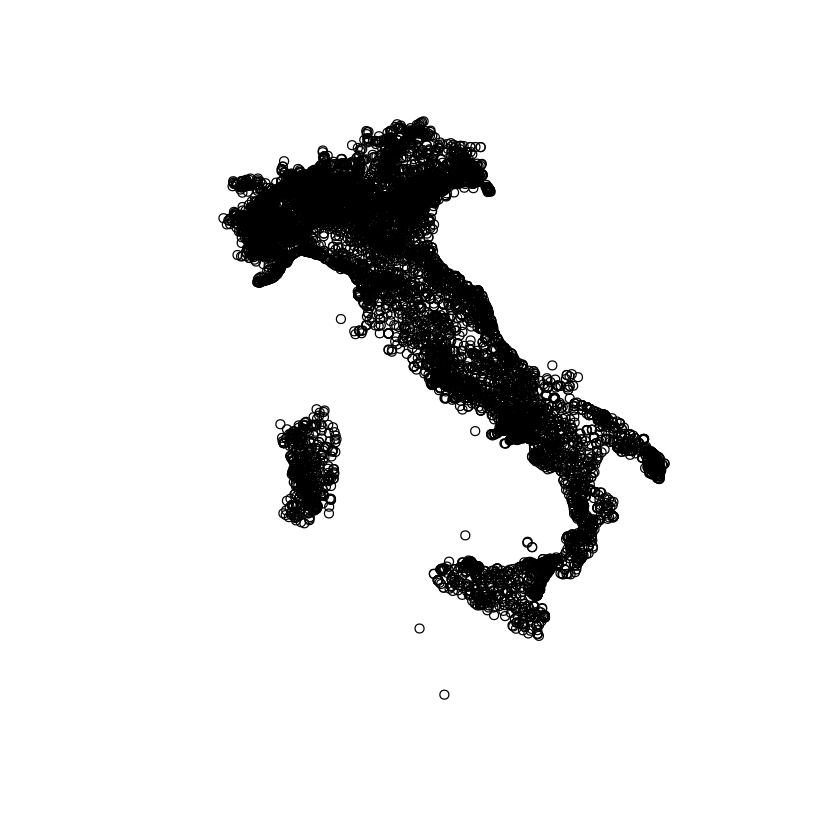

In [15]:
plot(geo_biblioteche$geometry)

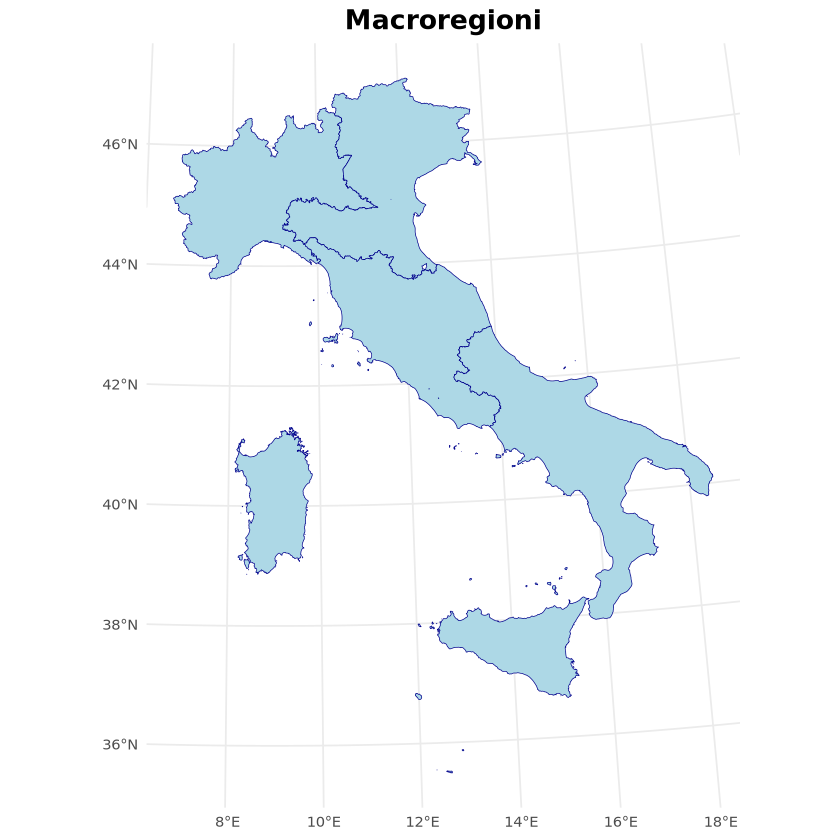

In [16]:
ggplot(data = macroregioni) +
  geom_sf(fill = "lightblue", color = "darkblue") +  
  theme_minimal() +
  ggtitle("Macroregioni") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
  )

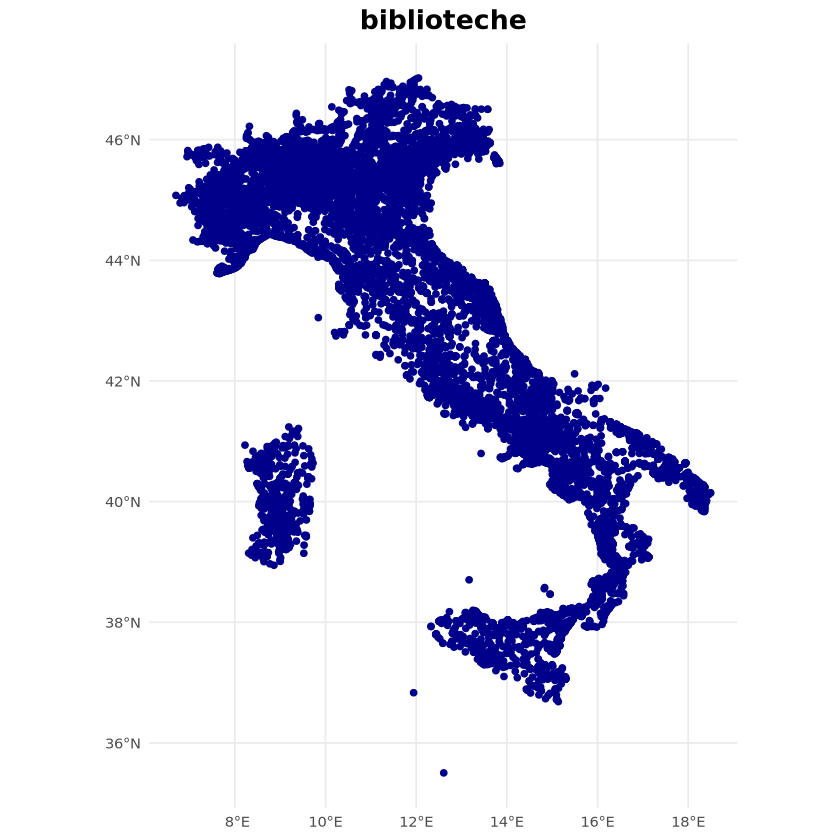

In [17]:
ggplot(data = geo_biblioteche) +
  geom_sf(fill = "lightblue", color = "darkblue") +  
  theme_minimal() +
  ggtitle("biblioteche") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
  )

In [18]:
st_crs(macroregioni)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 32N 
  wkt:
PROJCRS["WGS 84 / UTM zone 32N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            MEMBER["World Geodetic System 1984 (G2296)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 32N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PA

**ERRORE**!<br/>
Va usata la stessa proiezione<br/>
La proiezione usata da ISTAT è EPSG:32632

sovraponianmo usando la stessa proiezione

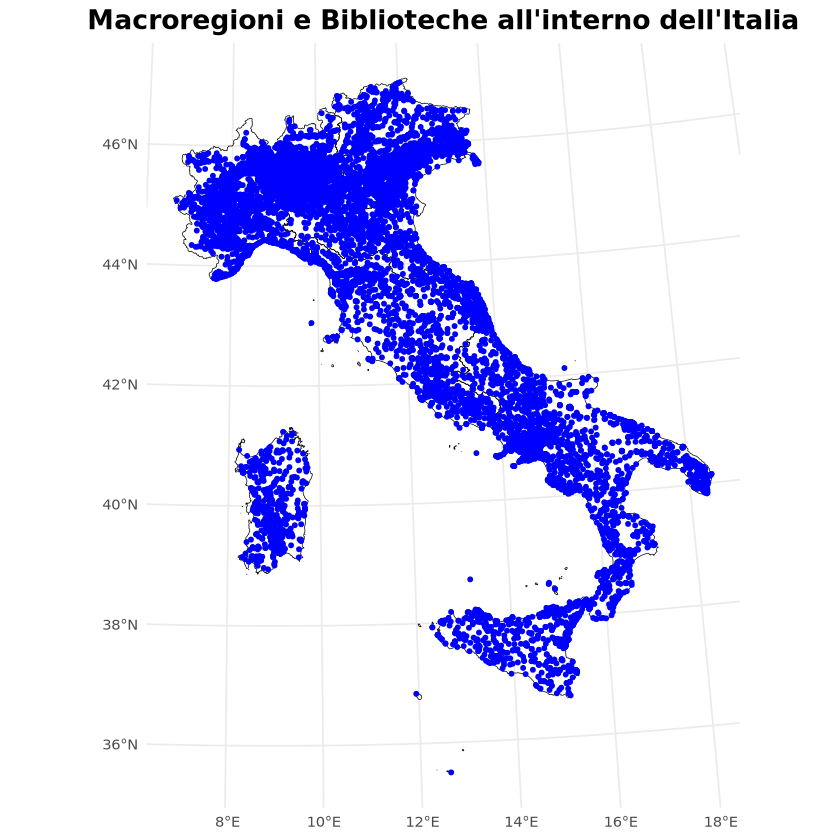

In [19]:

ggplot() +
  geom_sf(data = macroregioni, color = "black", fill = NA) +  # Macroregioni con bordi neri e senza riempimento
  geom_sf(data = geo_biblioteche, color = "blue", size = 1) +  # Biblioteche in blu
  theme_minimal() +
  ggtitle("Macroregioni e Biblioteche all'interno dell'Italia") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
  )

In [20]:
macroregioni_4326 <- st_transform(macroregioni, crs = 4326)

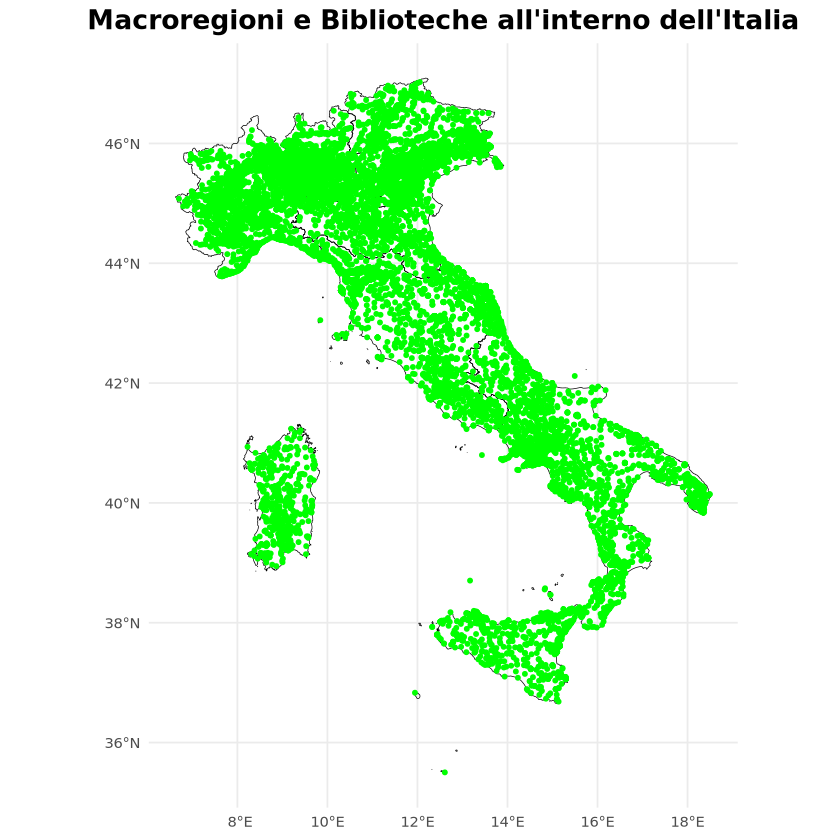

In [21]:
ggplot() +
  geom_sf(data = macroregioni_4326, color = "black", fill = NA) +
  geom_sf(data = geo_biblioteche, color = "green", size = 1) +
  theme_minimal() +
  ggtitle("Macroregioni e Biblioteche all'interno dell'Italia") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
  )

---
# Relazioni spaziali
## come due oggetti spaziali si relazionano fra di loro

![](https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png)

from [https://en.wikipedia.org/wiki/Spatial_relation](https://en.wikipedia.org/wiki/Spatial_relation)

## Relazione fra oggetti singoli

Es.<br>
Questa biblioteca si trova nella macroregione italiana a Nord-Est?

estriamo la regione a Nord-Est

In [22]:
macroregioni_4326

COD_RIP DEN_RIP    Shape_Leng Shape_Area  geom                          
1 1       Nord-ovest 2330675    57930826800 MULTIPOLYGON (((9.851328 44...
2 2       Nord-est   2313109    62396110675 MULTIPOLYGON (((10.48032 44...
3 3       Centro     2013166    58030006351 MULTIPOLYGON (((13.45607 40...
4 4       Sud        2535023    73781812999 MULTIPOLYGON (((15.29461 40...
5 5       Isole      2793918    49930616360 MULTIPOLYGON (((8.412401 38...

In [23]:
northeast <- macroregioni_4326$geom[2]

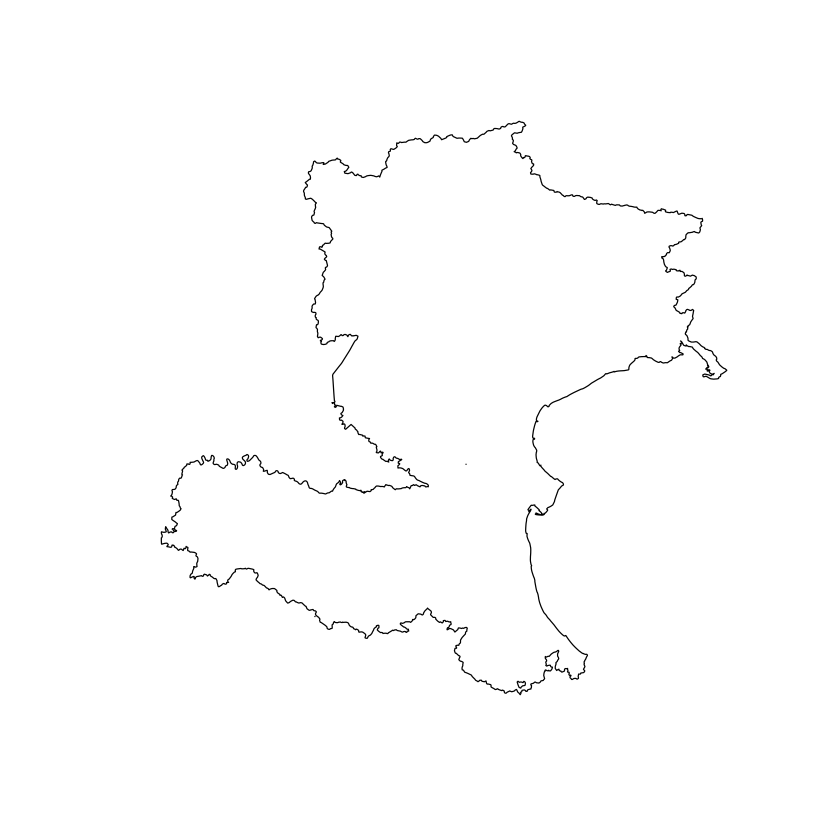

In [24]:
plot(northeast)

In [25]:
biblioteche_trento <- geo_biblioteche[geo_biblioteche$comune == "Trento", ]

In [26]:
biblioteca_trento <- biblioteche_trento$geometry[1]

### relazione within
nel nostro caso:<br>&nbsp;&nbsp;&nbsp;&nbsp;il punto è dentro l'area?

In [27]:
st_within(biblioteca_trento, northeast, sparse = FALSE)

[,1]
[1,] TRUE

## relazione contains
nel nostro caso:<br>&nbsp;&nbsp;&nbsp;&nbsp;l'area contiene il punto?

In [28]:
st_contains(northeast,biblioteca_trento,sparse=FALSE)

[,1]
[1,] TRUE

In [29]:
within_indices <- st_within(geo_biblioteche$geometry, northeast, sparse = FALSE)
biblioteche_nordest <- geo_biblioteche[within_indices, ]

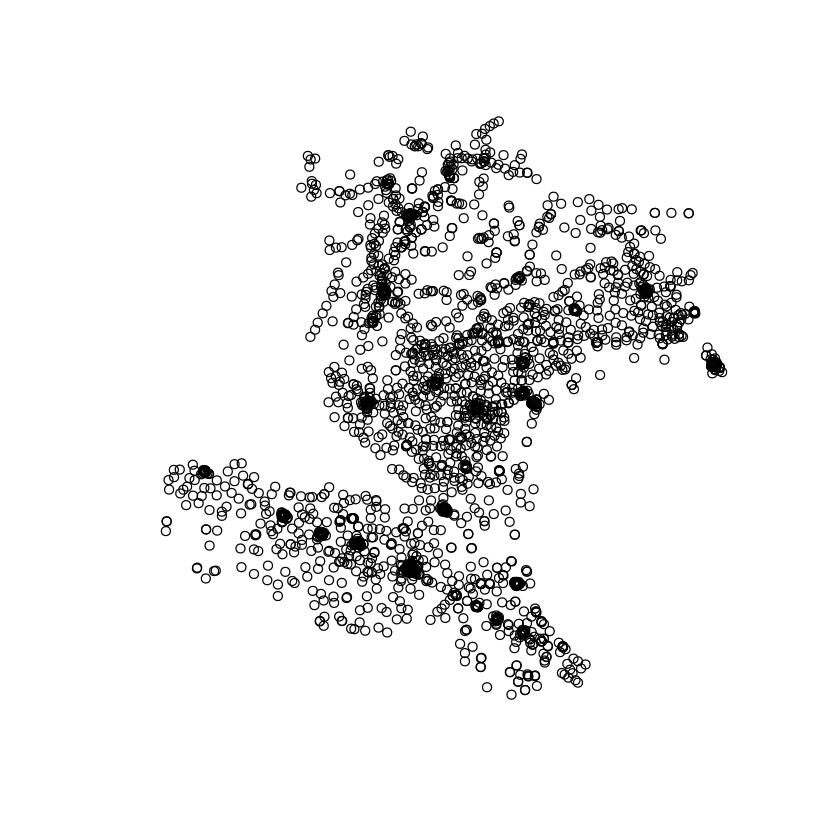

In [30]:
plot(biblioteche_nordest$geometry)

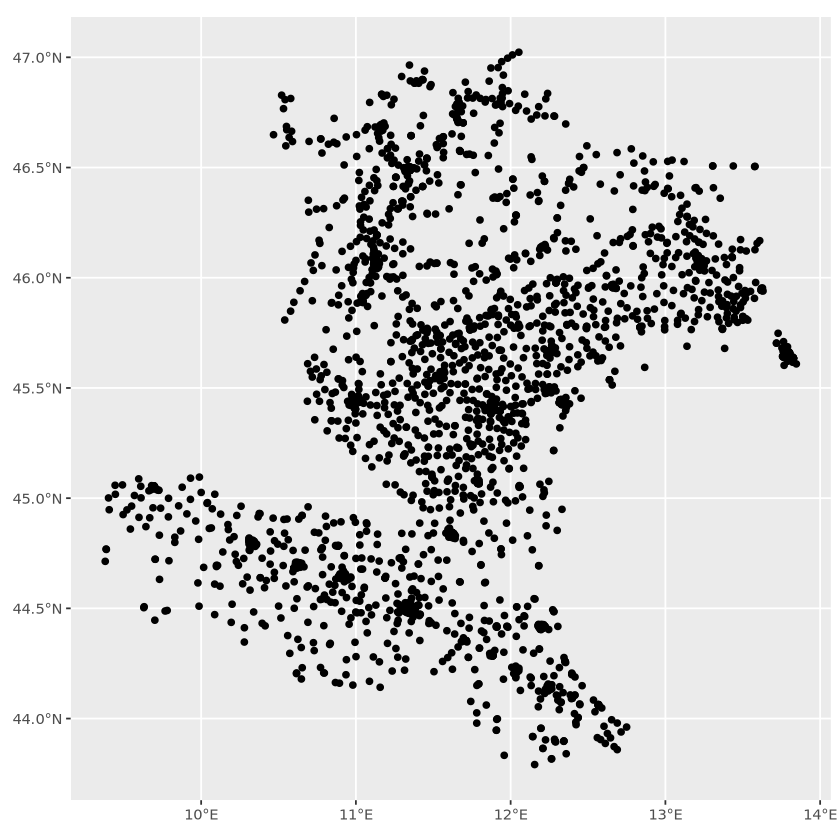

In [31]:
ggplot() + geom_sf(data = biblioteche_nordest)

---


<b>Referenze</b>: <br>

Panoramica delle diverse funzioni di verifica di relazione spaziale (*spatial predicate functions*):
<ul>
    <li>`st_intersects`</li>
<li>`st_disjoint`</li>
<li>`st_touches`</li>
<li>`st_disjoint`</li>
<li>`st_crosses`</li>
<li>`st_within`</li>
<li>`st_contains`</li>
<li>`st_contains_properly`</li>
<li>`st_overlaps`</li>
<li>`st_equals'</li>
<li>`st_covers`</li>
<li>`st_covered_by'</li>
<li>`st_equals_exact'</li>
<li>`st_is_within_distance'</li>
</ul>


Vedi https://r-spatial.github.io/sf/reference/geos_binary_pred.html per conoscere le funzioni


Vedi https://en.wikipedia.org/wiki/DE-9IM per tutti i dettagli semantici di queste operazioni

# Spatial Joins

Così come è possibile creare una join tra dataframe è possibile farlo anche usando relazioni spaziali con [st_join](https://r-spatial.github.io/sf/reference/st_join.html)

In [32]:
# Esegui la join spaziale basata sulla relazione 'contains'
biblioteche_e_macroregioni <- st_join(
    macroregioni_4326,
    geo_biblioteche,
    join = st_contains,
    suffix = c("macroregione_", "biblioteca")
)


In [33]:
head(biblioteche_e_macroregioni,3)

COD_RIP DEN_RIP    Shape_Leng Shape_Area  codice-isil codice-sbn
1   1       Nord-ovest 2330675    57930826800 IT-AL0001   TO036     
1.1 1       Nord-ovest 2330675    57930826800 IT-AL0002   TO041     
1.2 1       Nord-ovest 2330675    57930826800 IT-AL0003   TO0X1     
    denominazione                                           
1   Biblioteca civica di Acqui Terme "La Fabbrica dei Libri"
1.1 Biblioteca civica Francesca Calvo                       
1.2 Biblioteca dell'Archivio di Stato di Alessandria        
    indirizzo                  frazione cap   geom                           ⋯
1   Via Maggiorino Ferraris 15 NA       15011 MULTIPOLYGON (((9.851328 44... ⋯
1.1 Piazza Vittorio Veneto 1   NA       15121 MULTIPOLYGON (((9.851328 44... ⋯
1.2 Via Giorgio Solero 43      NA       15121 MULTIPOLYGON (((9.851328 44... ⋯
    provincia   regione  codice istat provincia latitudine longitudine
1   Alessandria PIEMONTE 6                      44.67817   8.465605   
1.1 Alessandria PIEMONTE 6                      44.91145   8.619391   
1.2 Alessandria PIEMONTE 6                      44.91380   8.626133   
    telefono       fax            email                                  
1   +39 0144770267 +39 014457627  al0001@biblioteche.ruparpiemonte.it    
1.1 +39 0131515911 +39 0131515902 biblioteca.civica@comune.alessandria.it
1.2 +39 0131252794 NA             as-al@cultura.gov.it                   
    url                                                                 
1   http://biblioteca.comune.acquiterme.al.it/                          
1.1 http://www.comune.alessandria.it                                    
1.2 http://www.asalessandria.beniculturali.it/index.php?it/99/biblioteca
    geom                          
1   MULTIPOLYGON (((9.851328 44...
1.1 MULTIPOLYGON (((9.851328 44...
1.2 MULTIPOLYGON (((9.851328 44...

In [34]:
names(biblioteche_e_macroregioni)

[1] "COD_RIP"                "DEN_RIP"                "Shape_Leng"            
 [4] "Shape_Area"             "codice-isil"            "codice-sbn"            
 [7] "denominazione"          "indirizzo"              "frazione"              
[10] "cap"                    "comune"                 "codice istat comune"   
[13] "provincia"              "regione"                "codice istat provincia"
[16] "latitudine"             "longitudine"            "telefono"              
[19] "fax"                    "email"                  "url"                   
[22] "geom"

In [35]:
names(geo_biblioteche)

[1] "codice-isil"            "codice-sbn"             "denominazione"         
 [4] "indirizzo"              "frazione"               "cap"                   
 [7] "comune"                 "codice istat comune"    "provincia"             
[10] "regione"                "codice istat provincia" "latitudine"            
[13] "longitudine"            "telefono"               "fax"                   
[16] "email"                  "url"                    "geometry"

In [36]:
names(macroregioni_4326)

[1] "COD_RIP"    "DEN_RIP"    "Shape_Leng" "Shape_Area" "geom"

## Operazioni spaziali
metodi di analisi che restituiscono nuovi oggetti geometrici 

## buffer

Restituisce una rappresentazione approssimativa di tutti i punti entro una determinata distanza da questo oggetto geometrico.

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/buffer.png)

In [37]:
# Filtra il dataframe per selezionare solo le righe con 'comune' uguale a 'Trento'
biblioteche_trento <- geo_biblioteche[geo_biblioteche$comune == 'Trento', ]

# Trasforma il sistema di coordinate in EPSG:32632 (UTM zona 32N)
biblioteche_trento_32632 <- st_transform(biblioteche_trento, crs = 32632)

# Seleziona la prima geometria (indice 1, poiché R inizia a contare da 1)
biblioteca_trento_32632 <- biblioteche_trento_32632$geometry[1]

# Visualizza la geometria
print(biblioteca_trento_32632)

Geometry set for 1 feature 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 664016.8 ymin: 5103987 xmax: 664016.8 ymax: 5103987
Projected CRS: WGS 84 / UTM zone 32N


POINT (664016.8 5103987)



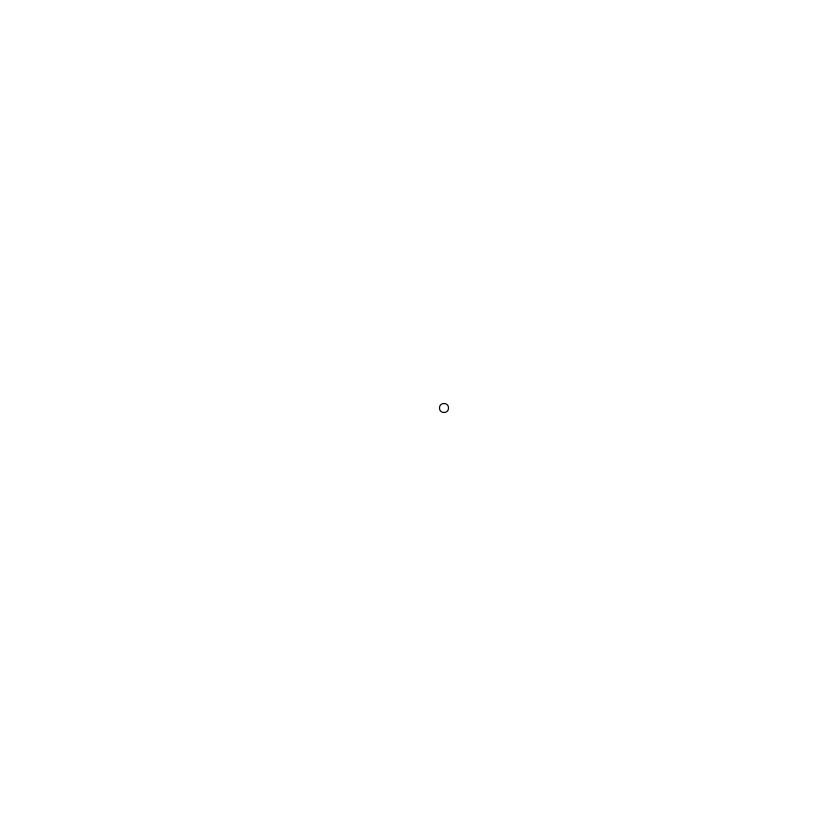

In [38]:
plot(biblioteca_trento_32632)

In [39]:
# Crea un buffer di 1000 metri attorno alla geometria
buffer_1000m <- st_buffer(biblioteca_trento_32632, dist = 1000)

# Visualizza il risultato
print(buffer_1000m)

Geometry set for 1 feature 
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 663016.8 ymin: 5102987 xmax: 665016.8 ymax: 5104987
Projected CRS: WGS 84 / UTM zone 32N


POLYGON ((665016.8 5103987, 665015.5 5103935, 6...



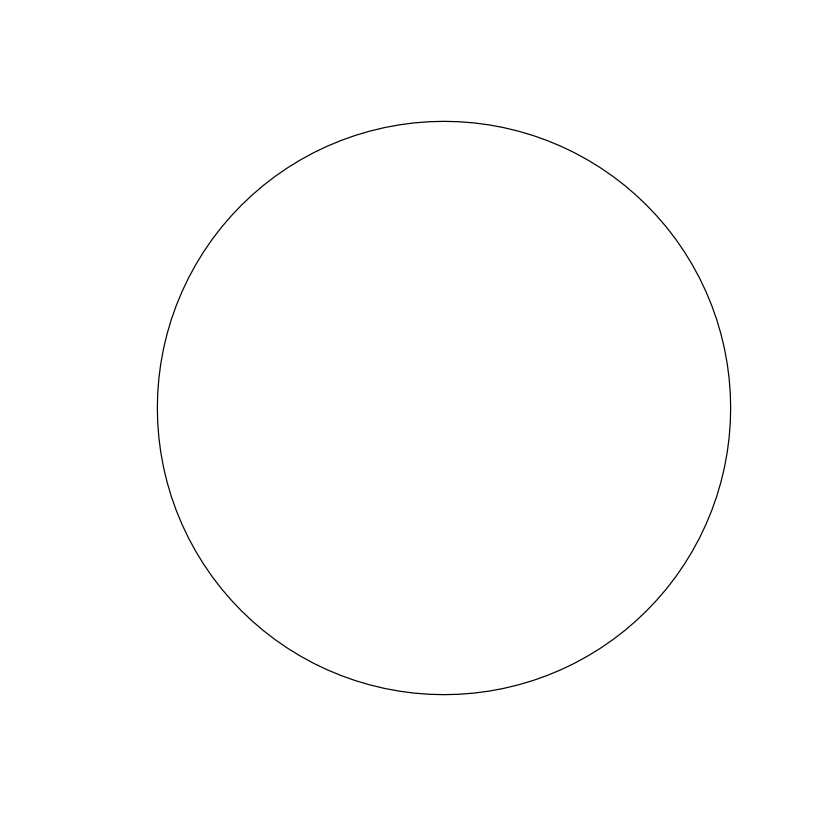

In [40]:
plot(buffer_1000m)

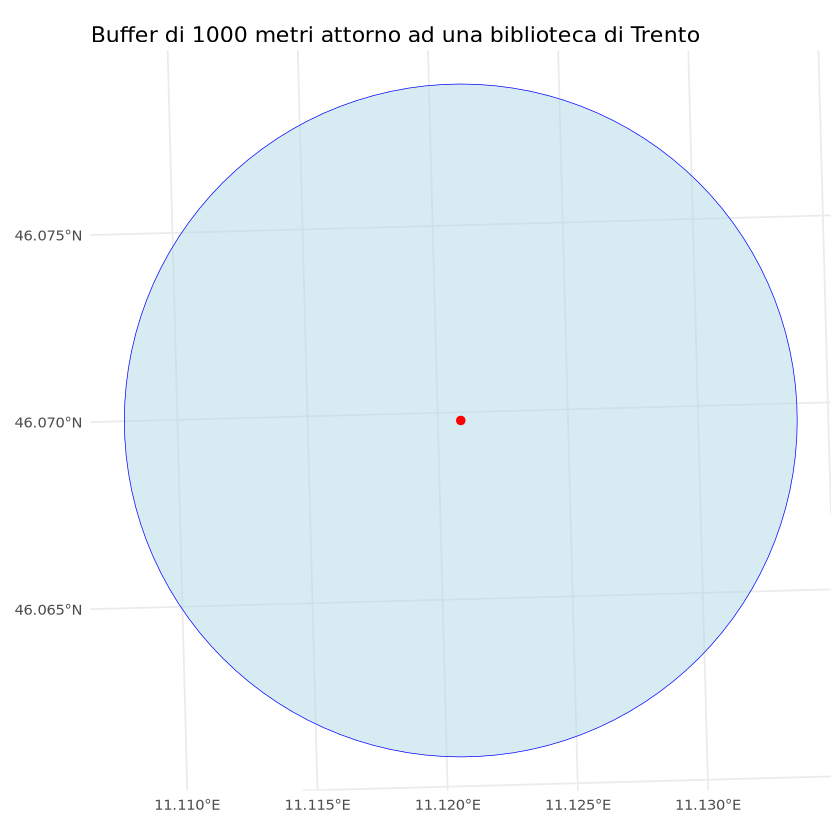

In [41]:
ggplot() +
  geom_sf(data = buffer_1000m, fill = "lightblue", color = "blue", alpha = 0.5) +
  geom_sf(data = biblioteca_trento_32632, color = "red", size = 2) +
  theme_minimal() +
  labs(title = "Buffer di 1000 metri attorno ad una biblioteca di Trento")

a causa dell'algoritmo con cui è costruito il buffer, all'aumentare del valore, da qualunque geometria si parta, il risultato assumerà sempre più la forma di una circonferenza.

<img src="https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/buffer.gif" width="450px"/>

## simplify

    Restituisce una rappresentazione semplificata dell'oggetto geometrico.

In [42]:
northeast_geometry = macroregioni[macroregioni$COD_RIP == 2, ]$geom[1]

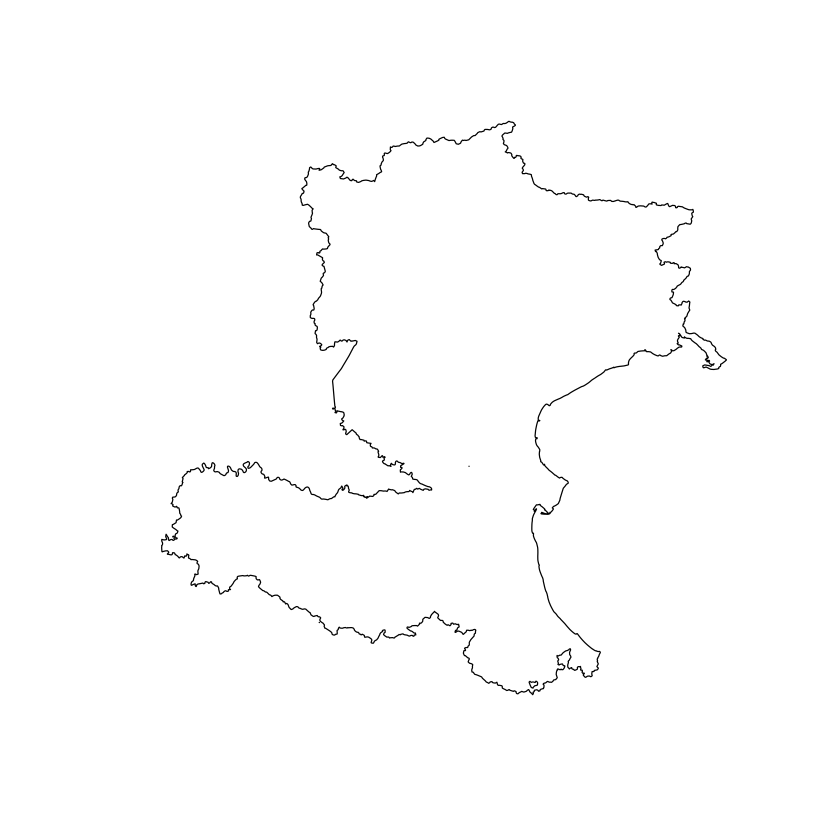

In [43]:
plot(northeast_geometry)

In [44]:
northeast_simplified <- st_simplify(northeast_geometry, 
                                    dTolerance = 10000, 
                                    preserveTopology = FALSE)

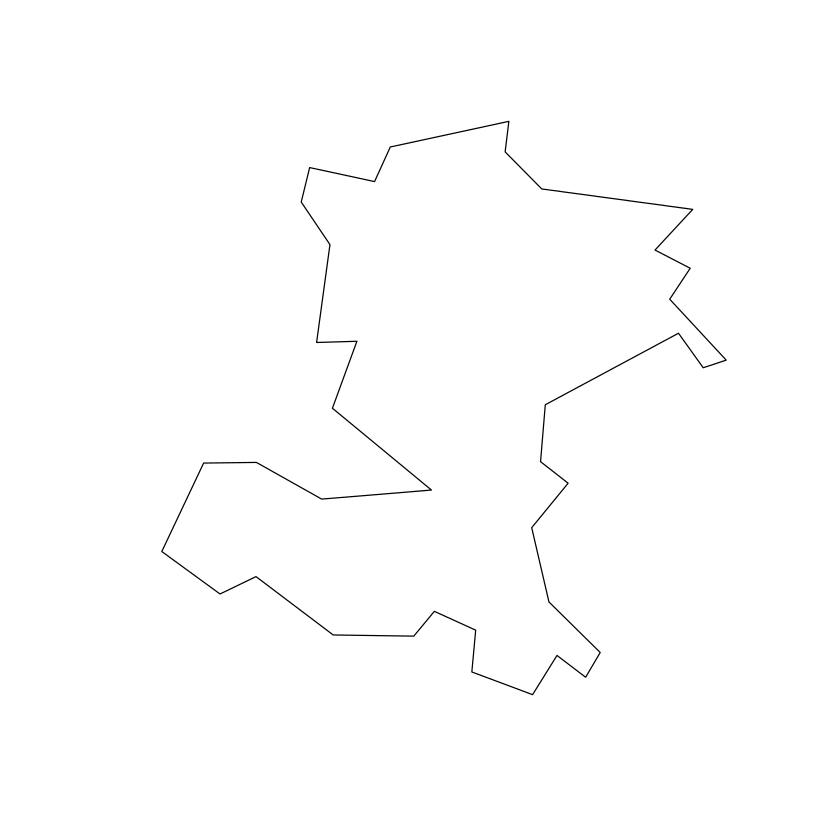

In [45]:
plot(northeast_simplified)

## Es. differenza simmetrica


Restituisce una rappresentazione dei punti in questo oggetto non nell'altro oggetto geometrico e dei punti nell'altro non in questo og

In [46]:
biblioteca_buffered <- st_buffer(biblioteca_trento_32632, dist = 9000)

In [47]:
sym_diff <- st_sym_difference(northeast_simplified, biblioteca_buffered)

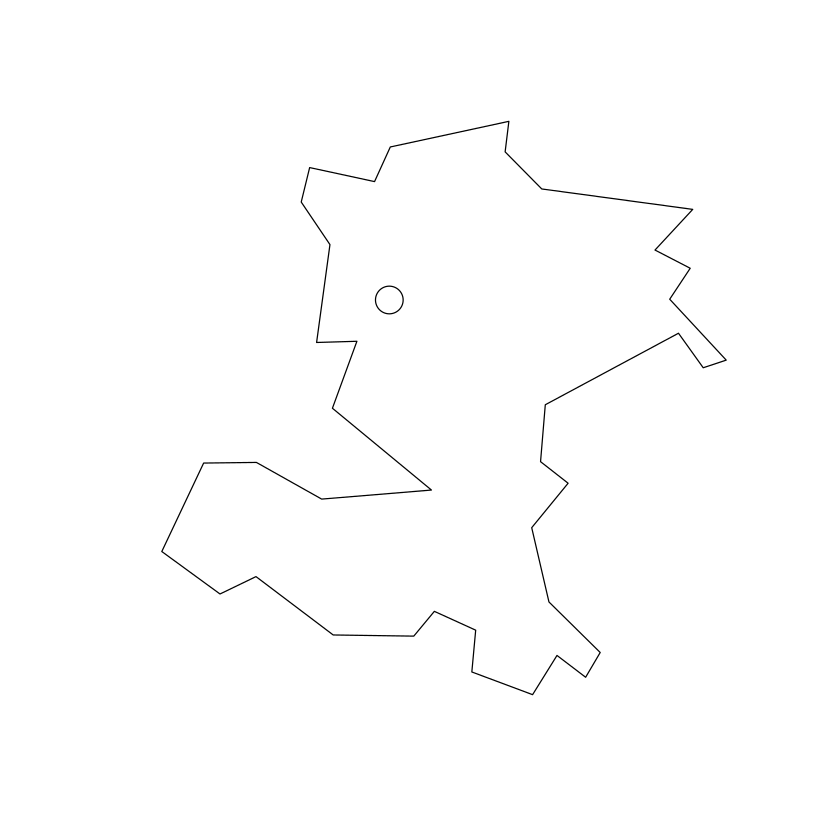

In [48]:
plot(sym_diff)

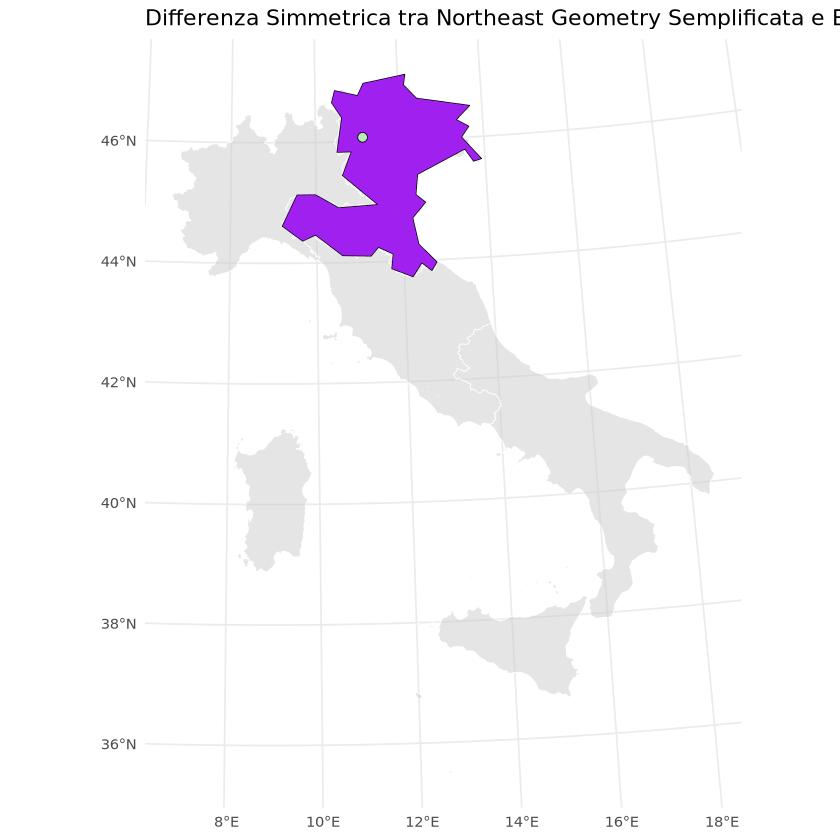

In [49]:
# Crea oggetti sf per la visualizzazione
northeast_simplified_sf <- st_sf(geometry = northeast_simplified)
biblioteca_buffered_sf <- st_sf(geometry = biblioteca_buffered)
sym_diff_sf <- st_sf(geometry = sym_diff)

# Visualizza le geometrie
ggplot() +
  geom_sf(data = macroregioni, fill = "grey80", color = "white", alpha = 0.5) +
  geom_sf(data = biblioteca_buffered_sf, fill = "lightgreen", color = "darkgreen", alpha = 0.5) +
  geom_sf(data = sym_diff_sf, fill = "purple", color = "black") +
  ggtitle("Differenza Simmetrica tra Northeast Geometry Semplificata e Buffer di Biblioteca Trento") +
  theme_minimal()

poligono convesso


In [50]:
# Unione di tutte le geometrie (equivalente a unary_union)
geo_biblioteche_union <- st_union(geo_biblioteche)


In [51]:
# Calcolo del poligomo convesso della geometria unita
geo_biblioteche_convex_hull <- st_convex_hull(geo_biblioteche_union)

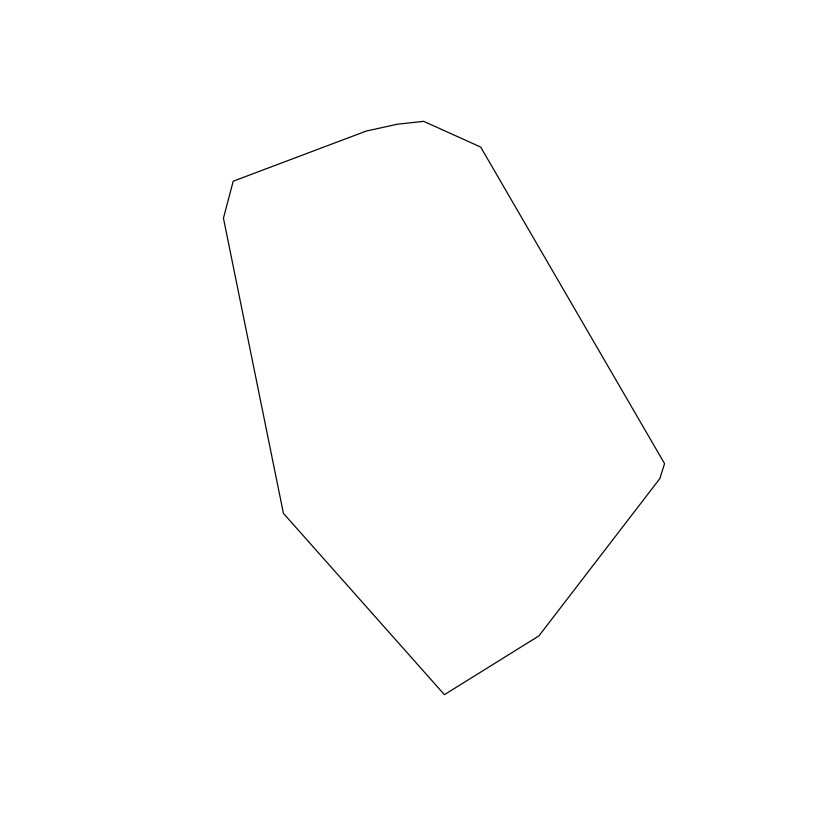

In [52]:
plot(geo_biblioteche_convex_hull)

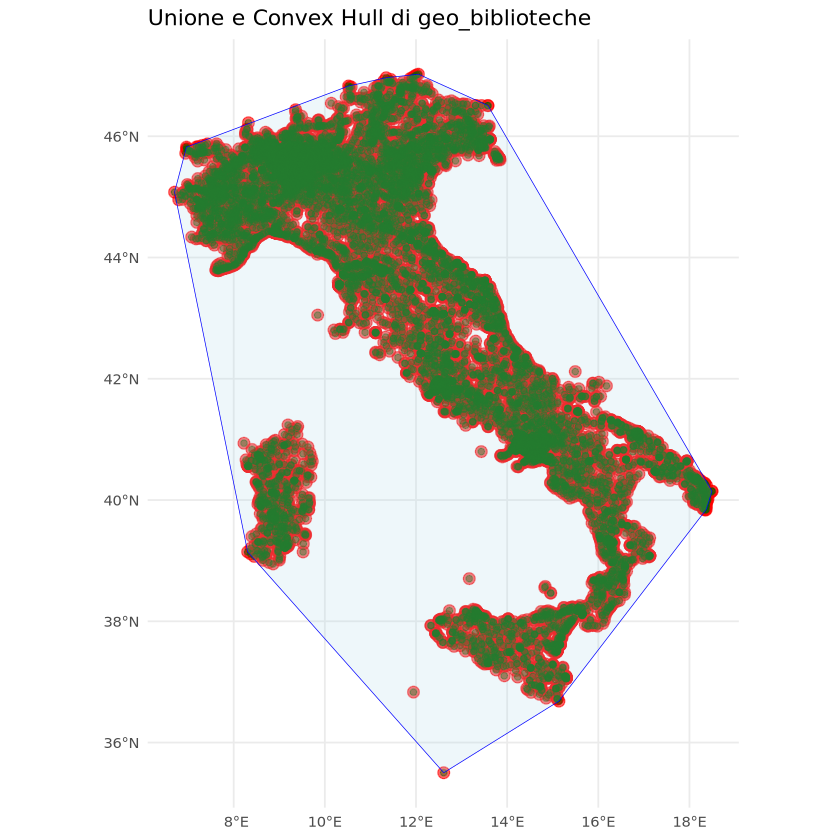

In [53]:
ggplot() +
  geom_sf(data = geo_biblioteche, 
          color = "red", 
          size = 3, 
          alpha = 0.6) +
  geom_sf(data = geo_biblioteche_union, 
          fill = "lightgreen", 
          color = "darkgreen", 
          alpha = 0.4) +
  geom_sf(data = geo_biblioteche_convex_hull, 
          fill = "lightblue", 
          color = "blue", 
          alpha = 0.2) +
  ggtitle("Unione e Convex Hull di geo_biblioteche") +
  theme_minimal()

---
# Aggregazione con dissolvenza

I dati spaziali sono spesso più granulari di quanto abbiamo bisogno. Ad esempio abbiamo i dati delle macroregioni ma non abbiamo una geometria con il confine dell'Italia.

Se abbiamo colonne per operare un *groupby* possiamo risolverlo ma per creare la geometria abbiamo bisogno della funzione *dissolve*.

In [54]:
# Aggiungi la nuova colonna 'stato' e assegna 'Italia' a tutte le righe
macroregioni["stato"] <- "Italia"

In [55]:
macroregioni

COD_RIP DEN_RIP    Shape_Leng Shape_Area  geom                          
1 1       Nord-ovest 2330675    57930826800 MULTIPOLYGON (((568227.8 48...
2 2       Nord-est   2313109    62396110675 MULTIPOLYGON (((618304.9 48...
3 3       Centro     2013166    58030006351 MULTIPOLYGON (((876021.9 45...
4 4       Sud        2535023    73781812999 MULTIPOLYGON (((1037305 444...
5 5       Isole      2793918    49930616360 MULTIPOLYGON (((449019.5 43...
  stato 
1 Italia
2 Italia
3 Italia
4 Italia
5 Italia

In [56]:
italia <- macroregioni[, c("stato", "geom")]

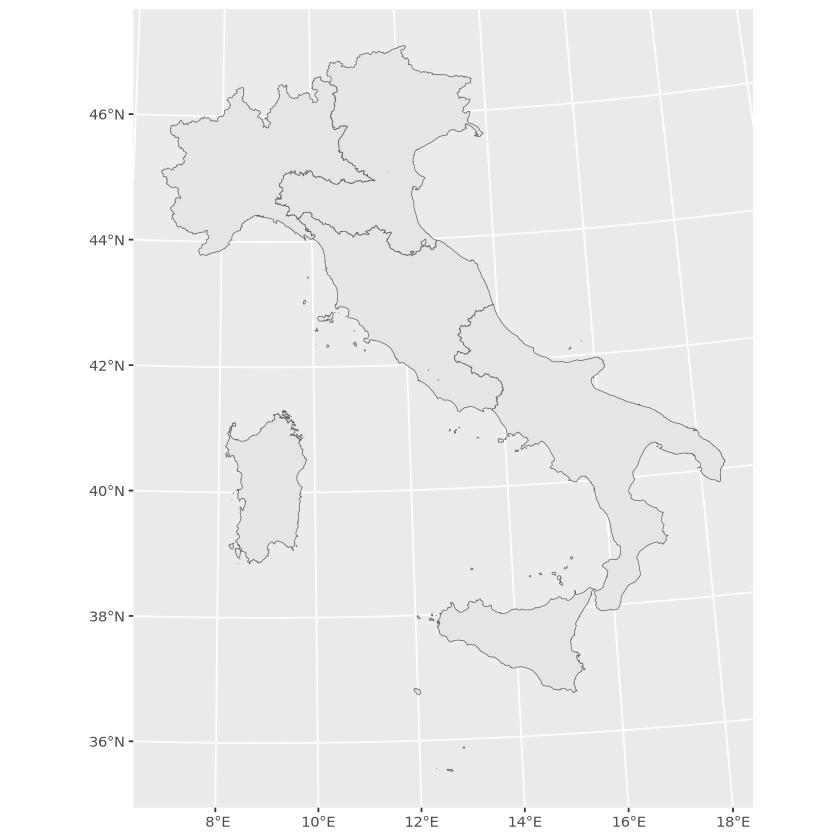

In [57]:
ggplot() + geom_sf(data = italia)

In [58]:
# Trasformazione del CRS a EPSG:4326 e dissolve per 'stato'
italia <- macroregioni %>%
  st_transform(crs = 4326) %>%    # Trasforma il CRS a WGS84
  group_by(stato) %>%             # Raggruppa per la colonna 'stato'
  summarise()         

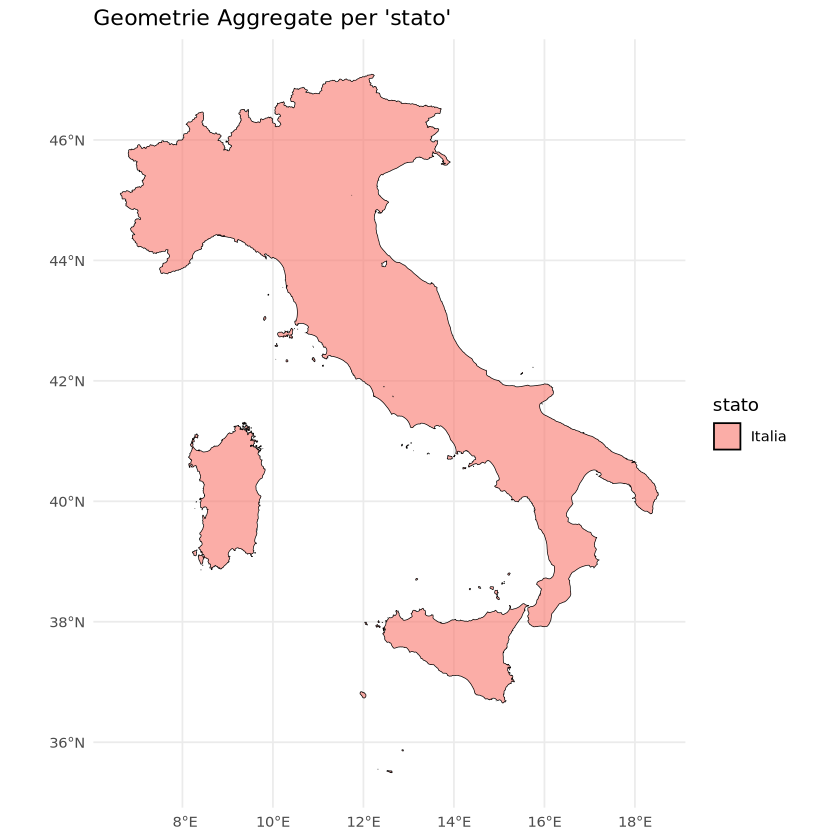

In [59]:
# Visualizzazione delle geometrie aggregate
ggplot() +
  geom_sf(data = italia, aes(fill = stato), color = "black", alpha = 0.6) +
  ggtitle("Geometrie Aggregate per 'stato'") +
  theme_minimal()

---
# Sovrapposizione

Le sovrapposizioni spaziali consentono di confrontare due GeoDataFrame contenenti geometrie poligonali o multipoligonali e creare un nuovo GeoDataFrame con le nuove geometrie che rappresentano la combinazione spaziale e le proprietà unite. Ciò ti consente di rispondere a domande come

    Quali sono i dati demografici delle zone censite entro 90 km da un punto?

L'idea di base è dimostrata dal grafico seguente, ma tieni presente che gli overlay operano a livello di dataframe, non su singole geometrie, e le proprietà di entrambi vengono mantenute

![](https://docs.qgis.org/testing/en/_images/overlay_operations.png)

sorgente: https://geopandas.org/gallery/overlays.html

In [60]:
# Filtra la macroregione con COD_RIP == 2
macroregione_nordest <- macroregioni[macroregioni$COD_RIP == 2, ]

# Trasforma il sistema di coordinate in EPSG:32632 (UTM zona 32N)
macroregione_nordest <- st_transform(macroregione_nordest, crs = 32632)
italia_32632 <- st_transform(italia, crs = 32632)

# Esegui l'operazione di differenza spaziale
overlay <- st_difference(italia_32632, macroregione_nordest)


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


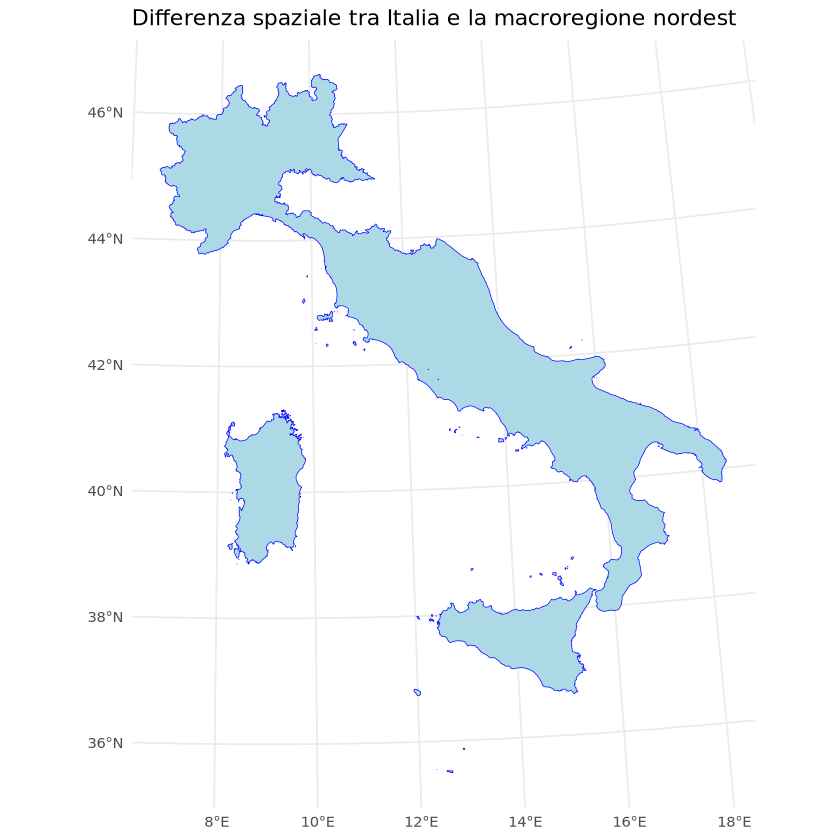

In [61]:
ggplot() +
  geom_sf(data = overlay, fill = "lightblue", color = "blue") +
  theme_minimal() +
  labs(title = "Differenza spaziale tra Italia e la macroregione nordest")